In [159]:
#This project uses COVID-19 mental health data collected from U.S. states
#to understand how the pandemic impacted anxiety, depression, and therapy access among adults
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
read1=pd.read_csv("C:\\Users\\archa\\Downloads\\Mental Health.csv")
read1.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [160]:
read1.shape
read1.isnull().sum()

Indicator                     0
Group                         0
State                         0
Subgroup                      0
Phase                         0
Time Period                   0
Time Period Label             0
Time Period Start Date        0
Time Period End Date          0
Value                       490
LowCI                       490
HighCI                      490
Confidence Interval         490
Quartile Range             3672
Suppression Flag          10382
dtype: int64

In [161]:
#Objective 1: To clean the dataset by handling missing values and detect outliers using boxplots in Python
mean1 = read1['Value'].mean()
read1['Value'] = read1['Value'].fillna(mean1)
mean2 = read1['LowCI'].mean() 
read1['LowCI'] = read1['LowCI'].fillna(mean2)
mean3 = read1['HighCI'].mean()
read1['HighCI'] = read1['HighCI'].fillna(mean3)
mode1 = read1['Confidence Interval'].mode()[0]
read1['Confidence Interval'] = read1['Confidence Interval'].fillna(mode1)
mode2 = read1['Quartile Range'].mode()[0]
read1['Quartile Range'] = read1['Quartile Range'].fillna(mode2)
mode3 = read1['Suppression Flag'].mode()[0]
read1['Suppression Flag'] = read1['Suppression Flag'].fillna(mode3)

print("Missing values after filling:")
print(read1.isnull().sum())



Missing values after filling:
Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
LowCI                     0
HighCI                    0
Confidence Interval       0
Quartile Range            0
Suppression Flag          0
dtype: int64


In [68]:
print("Summary Statistics")
print(read1.describe())


Summary Statistics
        Time Period         Value         LowCI        HighCI  \
count  10404.000000  10404.000000  10404.000000  10404.000000   
mean      28.134948     17.450736     14.771565     20.475661   
std       11.040210      8.073437      7.476835      8.836755   
min        1.000000      1.400000      0.800000      2.000000   
25%       20.000000     10.500000      8.200000     13.100000   
50%       29.000000     17.450736     14.771565     20.300000   
75%       37.000000     23.700000     20.500000     27.000000   
max       45.000000     62.900000     53.200000     71.900000   

       Suppression Flag  
count           10404.0  
mean                1.0  
std                 0.0  
min                 1.0  
25%                 1.0  
50%                 1.0  
75%                 1.0  
max                 1.0  


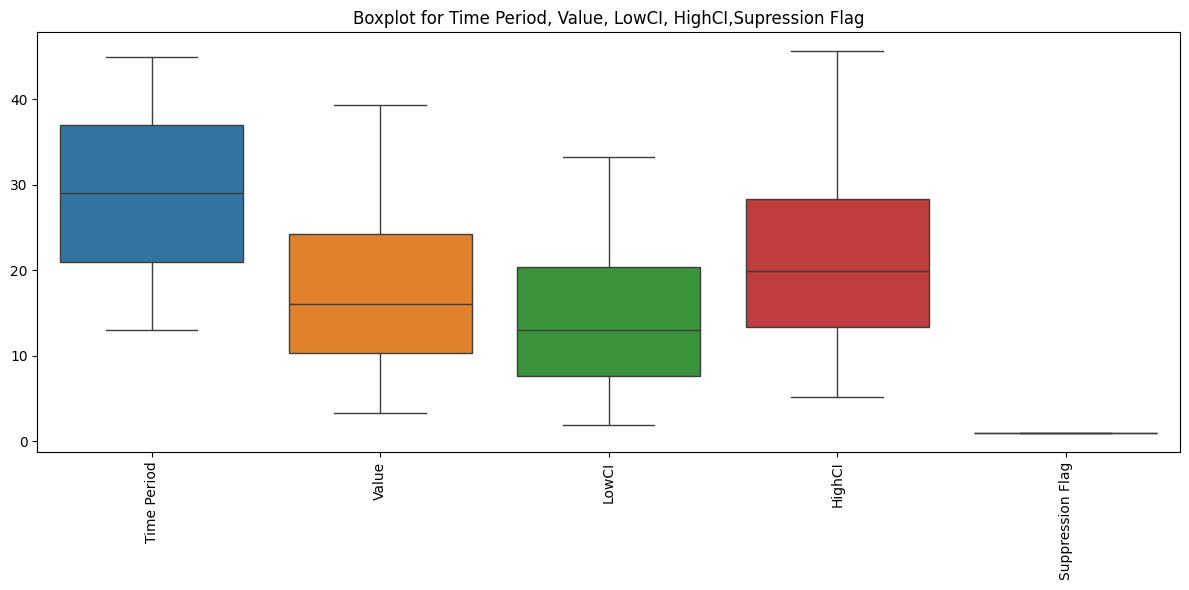

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Time Period','Value', 'LowCI', 'HighCI','Suppression Flag']])
plt.xticks(rotation=90)
plt.title("Boxplot for Time Period, Value, LowCI, HighCI,Supression Flag")
plt.tight_layout()
plt.show()

In [70]:
read1["Time Period Start Date"]=pd.to_datetime(read1["Time Period Start Date"])
read1=read1.sort_values("Time Period Start Date")

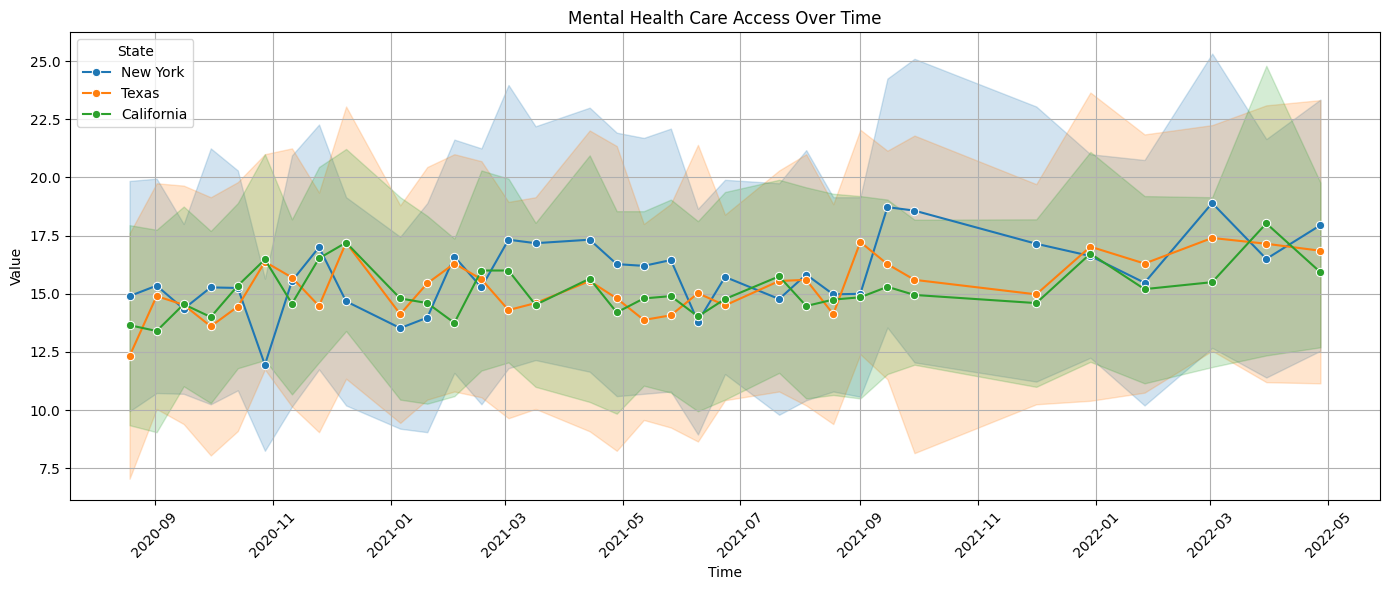

In [74]:
#Objective 2: Analyze how the value of mental health care access has changed over time across different phases or time periods
states=['California','Texas','New York']
data1=read1[read1["State"].isin(states)]
plt.figure(figsize=(14,6))
sns.lineplot(data=data1, x="Time Period Start Date" ,y="Value", hue="State",marker="o")
plt.title("Mental Health Care Access Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


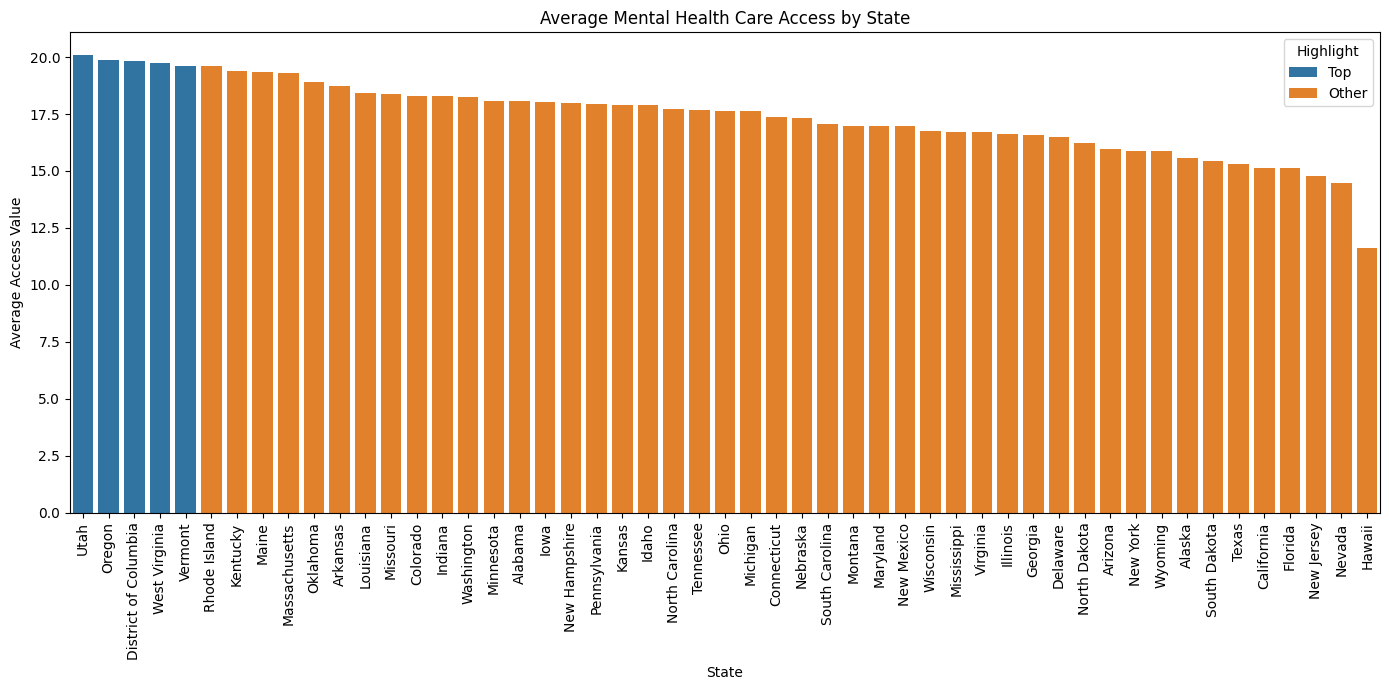

In [85]:
#Objective 3: Comparative Analysis of Mental Health Care Access Across U.S. States
avg1 = df.groupby("State")["Value"].mean().sort_values(ascending=False).reset_index()
avg1["Highlight"]=["Top" if i<5 else "Other" for i in range(len(avg1))]
plt.figure(figsize=(14,7))
sns.barplot(data=avg1,x="State",y="Value",hue="Highlight")
plt.xticks(rotation=90)
plt.title("Average Mental Health Care Access by State")
plt.xlabel("State")
plt.ylabel("Average Access Value")
plt.tight_layout()
plt.show()

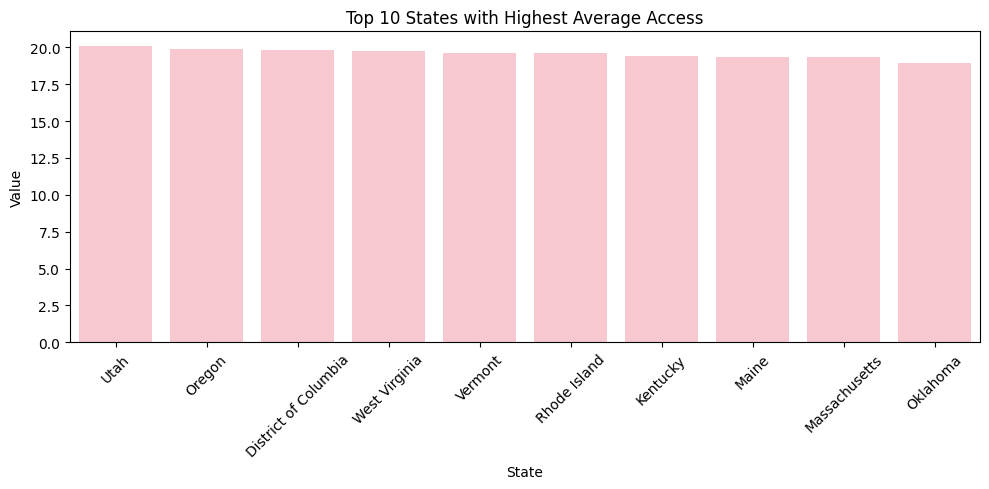

In [86]:
#Top 10 States 
top_10=avg1.head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_10,x="State",y="Value",color="pink")
plt.title("Top 10 States with Highest Average Access")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()         

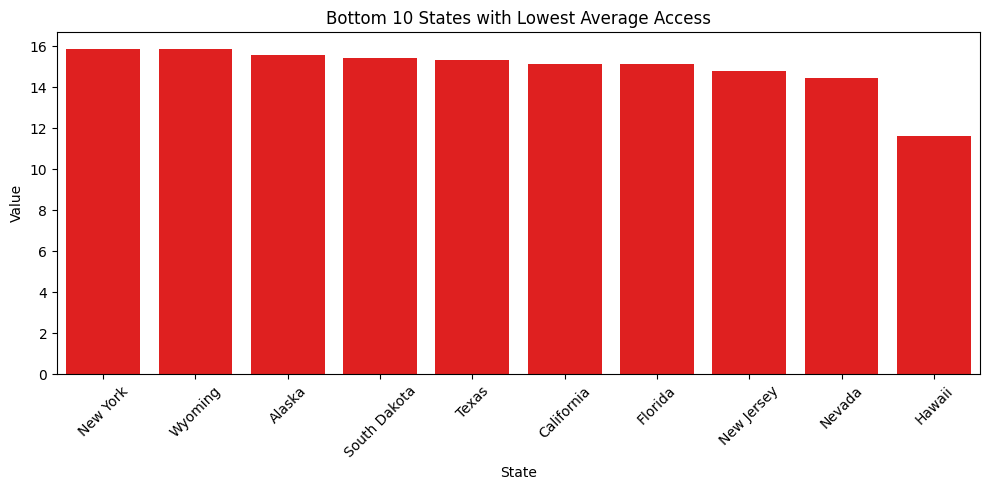

In [88]:
# Bottom 10 States
bottom_10=avg1.tail(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=bottom_10, x="State", y="Value",color="red")
plt.title("Bottom 10 States with Lowest Average Access")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

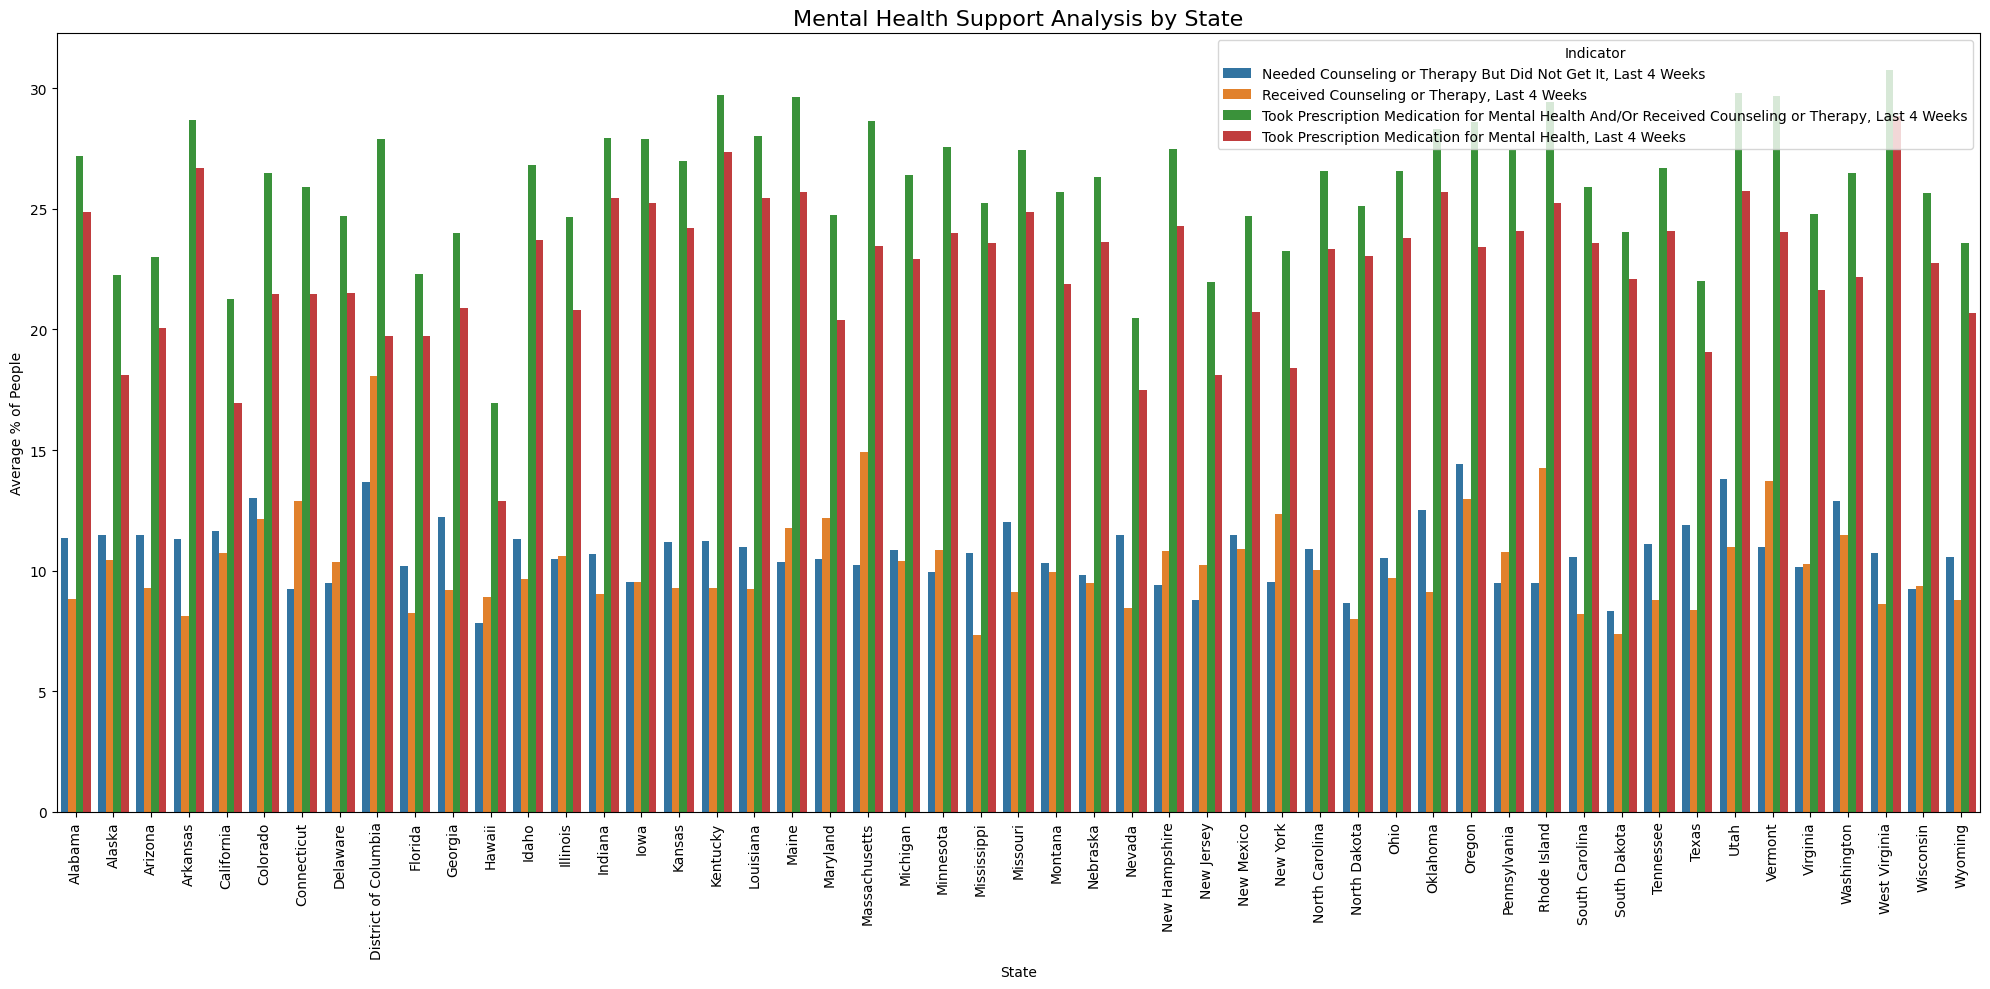

In [100]:
#Objective 4: Analyze the access and gaps in mental health support across U.S. states by comparing four key mental health indicators: medication usage, therapy received, overall treatment access, and unmet therapy needs.
read2 = read1[read1["Group"] == "By State"]
indicators = [ "Took Prescription Medication for Mental Health, Last 4 Weeks",
    "Received Counseling or Therapy, Last 4 Weeks",
    "Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks",
    "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks"]
read3 = read2[read2["Indicator"].isin(indicators)]
avg_data = read3.groupby(["State", "Indicator"])["Value"].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(data=avg_data, x="State", y="Value", hue="Indicator")
plt.title("Mental Health Support Analysis by State", fontsize=16)
plt.xlabel("State")
plt.ylabel("Average % of People")
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


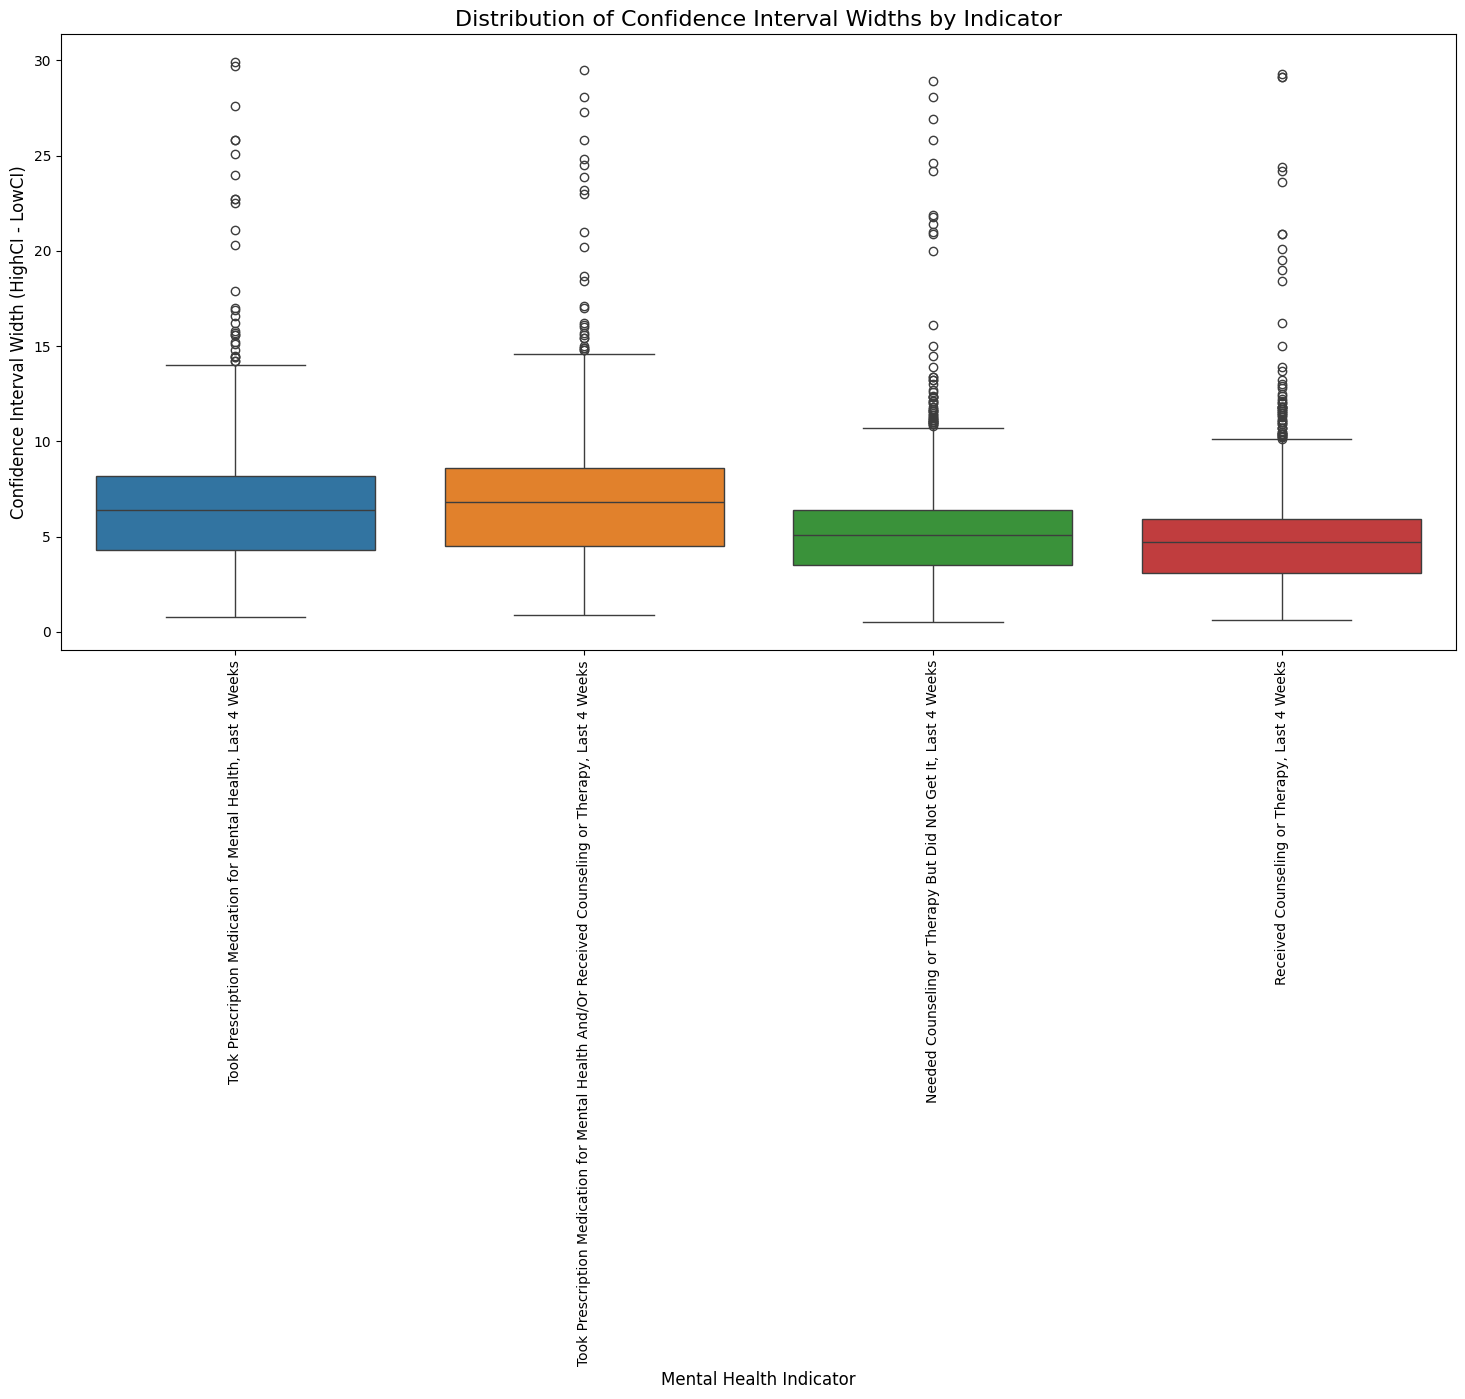

In [135]:
#Objective 5: Identify Mental Health Indicators with Most and Least Reliable Data
ci_read = read1[["State", "Indicator", "LowCI", "HighCI", "Value"]].dropna()
ci_read["CI_Width"] = ci_read["HighCI"] - ci_read["LowCI"]
plt.figure(figsize=(18, 8))
sns.boxplot(data=ci_read, x="Indicator", y="CI_Width", hue="Indicator")
plt.title("Distribution of Confidence Interval Widths by Indicator", fontsize=16)
plt.xlabel("Mental Health Indicator", fontsize=12)
plt.ylabel("Confidence Interval Width (HighCI - LowCI)", fontsize=12)
plt.xticks(rotation=90)
plt.show()

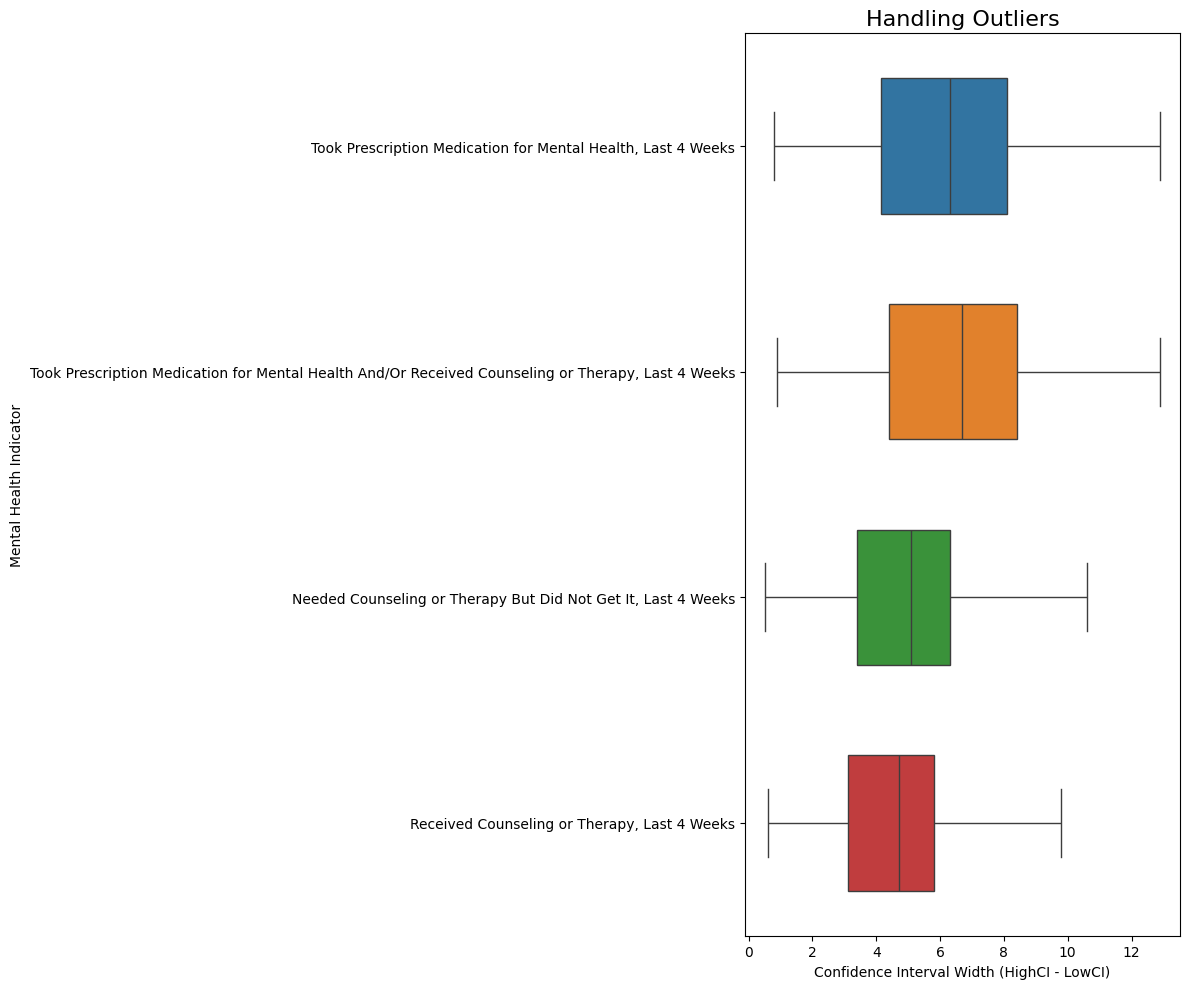

In [163]:
q1 = np.percentile(ci_read["CI_Width"], 25)
q3 = np.percentile(ci_read["CI_Width"], 75)
iqr = q3 - q1
lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)
ci_outlier = ci_read[(ci_read["CI_Width"] >= lb) & (ci_read["CI_Width"] <= ub)]
plt.figure(figsize=(12, 10))
sns.boxplot(data=ci_outlier, y="Indicator", x="CI_Width",hue="Indicator", width=0.6,showfliers=False)
plt.title("Handling Outliers", fontsize=16)
plt.xlabel("Confidence Interval Width (HighCI - LowCI)")
plt.ylabel("Mental Health Indicator")
plt.tight_layout()
plt.show()
